In [1]:
import MLBGenerateLineUps as lineup
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
Date = 'Aug2'

In [3]:
#Parse Data and Save Projections.
LineUpGen = lineup.MLBGenerateLineUps(Date)

In [4]:
#Return Standard Optimized Line Up
LineUpGen.returnOptLineUps()

,Name,Team,Position,Salary,FP,Var
0,Max Scherzer,Nationals,SP,13000,27.610,140.874343
22,Giancarlo Stanton,Yankees,OF,5100,10.910,75.810524
32,Paul Goldschmidt,Diamondbacks,1B,4800,9.670,70.022551
38,Joey Gallo,Rangers,1B/OF,4700,9.660,65.013029
75,Jason Vargas,Mets,SP,4100,12.345,118.166288
85,Cesar Hernandez,Phillies,2B,4000,8.260,37.126198
88,Mark Trumbo,Orioles,OF,3900,8.480,60.480484
100,Tim Beckham,Orioles,3B/SS,3800,8.595,45.544040
102,Kurt Suzuki,Braves,C,3800,7.575,38.557579
148,Amed Rosario,Mets,SS,2800,7.335,38.094859


In [5]:
LambdaSet = np.linspace(-0.2, 0.15, num=50)

In [6]:
SolutionSet = LineUpGen.returnSetOptLineUps(LambdaSet, Known=True)

In [7]:
FullLineUp = LineUpGen.returnOptLineUps(Known=False)
FullLineUp

,Name,Team,Position,Salary,FP,Var
0,Max Scherzer,Nationals,SP,13000,27.610,140.874343
22,Giancarlo Stanton,Yankees,OF,5100,10.910,75.810524
32,Paul Goldschmidt,Diamondbacks,1B,4800,9.670,70.022551
38,Joey Gallo,Rangers,1B/OF,4700,9.660,65.013029
75,Jason Vargas,Mets,SP,4100,12.345,118.166288
85,Cesar Hernandez,Phillies,2B,4000,8.260,37.126198
88,Mark Trumbo,Orioles,OF,3900,8.480,60.480484
100,Tim Beckham,Orioles,3B/SS,3800,8.595,45.544040
102,Kurt Suzuki,Braves,C,3800,7.575,38.557579
148,Amed Rosario,Mets,SS,2800,7.335,38.094859


In [8]:
print("Mean: "+str(np.sum(FullLineUp['FP'])))

Mean: 110.44


In [9]:
Points = []
Var = []
for sol in SolutionSet:
    Points.append(sol[1])
    Var.append(sol[2])

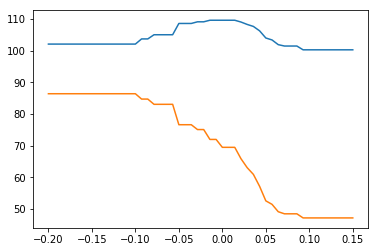

In [10]:
fig, ax = plt.subplots()
ax.plot(LambdaSet, np.array(Points))
ax.plot(LambdaSet, np.array(Var)/10)

In [11]:
P100 = []
P125 = []
P160 = []
for i in range(len(Points)):
    P100.append(1-stats.norm.cdf(100, loc=Points[i], scale=np.sqrt(0.8*Var[i])))
    P125.append(1-stats.norm.cdf(125, loc=Points[i], scale=np.sqrt(0.8*Var[i])))
    P160.append(1-stats.norm.cdf(160, loc=Points[i], scale=np.sqrt(0.8*Var[i]))) 

In [12]:
i100 = np.argmax(P100)
print('Mean: %f Var: %f Lambda: %f P>100: %f' % (SolutionSet[i100][1], SolutionSet[i100][2],LambdaSet[i100],P100[i100]))
SolutionSet[i100][0]

Mean: 109.595000 Var: 694.540751 Lambda: -0.000000 P>100: 0.658016


,Name,Team,Position,Salary,FP,Var
0,Max Scherzer,Nationals,SP,13000,27.610,140.874343
22,Giancarlo Stanton,Yankees,OF,5100,10.910,75.810524
38,Joey Gallo,Rangers,1B/OF,4700,9.660,65.013029
47,Willson Contreras,Cubs,C,4500,8.290,53.516563
75,Jason Vargas,Mets,SP,4100,12.345,118.166288
85,Cesar Hernandez,Phillies,2B,4000,8.260,37.126198
88,Mark Trumbo,Orioles,OF,3900,8.480,60.480484
100,Tim Beckham,Orioles,3B/SS,3800,8.595,45.544040
109,Justin Bour,Marlins,1B,3700,8.035,53.239846
135,Wilmer Flores,Mets,1B/3B,3200,7.410,44.769437


In [13]:
i125 = np.argmax(P125)
print('Mean: %d Var: %d Lambda: %f P>125: %f' % (SolutionSet[i125][1], SolutionSet[i125][2],LambdaSet[i125], P125[i125]))
SolutionSet[i125][0]

Mean: 109 Var: 719 Lambda: -0.014286 P>125: 0.260405


,Name,Team,Position,Salary,FP,Var
0,Max Scherzer,Nationals,SP,13000,27.610,140.874343
22,Giancarlo Stanton,Yankees,OF,5100,10.910,75.810524
30,Rougned Odor,Rangers,2B,4900,9.625,60.860604
38,Joey Gallo,Rangers,1B/OF,4700,9.660,65.013029
71,Ian Happ,Cubs,OF,4100,8.695,59.553162
75,Jason Vargas,Mets,SP,4100,12.345,118.166288
88,Mark Trumbo,Orioles,OF,3900,8.480,60.480484
100,Tim Beckham,Orioles,3B/SS,3800,8.595,45.544040
133,Matt Wieters,Nationals,C,3200,6.265,48.431634
135,Wilmer Flores,Mets,1B/3B,3200,7.410,44.769437


In [14]:
i160 = np.argmax(P160)
print('Mean: %d Var: %d Lambda: %f P>160: %f' % (SolutionSet[i160][1], SolutionSet[i160][2],LambdaSet[i160], P160[i160]))
SolutionSet[i160][0]

Mean: 109 Var: 750 Lambda: -0.028571 P>160: 0.018900


,Name,Team,Position,Salary,FP,Var
0,Max Scherzer,Nationals,SP,13000,27.610,140.874343
22,Giancarlo Stanton,Yankees,OF,5100,10.910,75.810524
30,Rougned Odor,Rangers,2B,4900,9.625,60.860604
75,Jason Vargas,Mets,SP,4100,12.345,118.166288
88,Mark Trumbo,Orioles,OF,3900,8.480,60.480484
96,Cody Bellinger,Dodgers,1B/OF,3900,8.240,76.458399
98,Chris Davis,Orioles,1B,3800,8.000,65.290850
99,Adrian Beltre,Rangers,3B,3800,8.365,58.019546
100,Tim Beckham,Orioles,3B/SS,3800,8.595,45.544040
104,Buster Posey,Giants,C,3700,6.930,49.186659
